In [1]:
import yfinance as yf
import datetime
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.patches as mpatches
from matplotlib.dates import date2num, DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
from mplfinance.original_flavor import candlestick_ohlc
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
from datetime import date, timedelta
from datetime import datetime

stock_name = "GOOG"
end_date = datetime.now()
curr_stock = stock_name + "L"

# Format the current date as "year-month-date"
# formatted_date = cend_date.strftime('%Y-%m-%d')

import datetime 
from datetime import date, timedelta

start_date = datetime.datetime(2015, 1, 1)
end_date  = datetime.datetime(2023, 8, 23)



my_stocks = yf.download(tickers = ["GOOGL", "PANW", "AMZN", "BUD", "AAPL", "MSFT", "GME", "TSLA", "NFLX", "META", "WMT", "WBA", "NVDA"]
, start=start_date, end=end_date, group_by='tickers')
my_stocks.head()
  

[*********************100%%**********************]  13 of 13 completed


AMZN                                                 \
               Open     High      Low    Close Adj Close    Volume   
Date                                                                 
2015-01-02  15.6290  15.7375  15.3480  15.4260   15.4260  55664000   
2015-01-05  15.3505  15.4190  15.0425  15.1095   15.1095  55484000   
2015-01-06  15.1120  15.1500  14.6190  14.7645   14.7645  70380000   
2015-01-07  14.8750  15.0640  14.7665  14.9210   14.9210  52806000   
2015-01-08  15.0160  15.1570  14.8055  15.0230   15.0230  61768000   

                   BUD                                      ...       PANW  \
                  Open        High         Low       Close  ...        Low   
Date                                                        ...              
2015-01-02  112.300003  112.480003  110.980003  111.739998  ...  39.200001   
2015-01-05  109.040001  109.709999  107.769997  108.089996  ...  40.060001   
2015-01-06  107.279999  108.540001  106.570000  107.849998  ...  39.363335   
2015-01-07  108.440002  109.949997  108.139999  109.419998  ...  41.209999   
2015-01-08  111.589996  113.769997  111.379997  112.879997  ...  41.933334   

                                                 WMT                        \
                Close  Adj Close   Volume       Open       High        Low   
Date                                                                         
2015-01-02  40.473331  40.473331  4951200  86.269997  86.720001  85.550003   
2015-01-05  41.243332  41.243332  4050600  85.720001  86.320000  85.510002   
2015-01-06  40.616669  40.616669  4053600  85.980003  86.750000  85.790001   
2015-01-07  41.843334  41.843334  3791400  86.779999  88.680000  86.669998   
2015-01-08  42.403332  42.403332  2144400  89.209999  90.669998  89.070000   

                                            
                Close  Adj Close    Volume  
Date                                        
2015-01-02  85.900002  71.431725   4501800  
2015-01-05  85.650002  71.223816   6979000  
2015-01-06  86.309998  71.772675   8205100  
2015-01-07  88.599998  73.676949   8498400  
2015-01-08  90.470001  75.231972  12713600  

[5 rows x 78 columns]

In [3]:
my_stocks.describe()

AMZN                                                      \
              Open         High          Low        Close    Adj Close   
count  2174.000000  2174.000000  2174.000000  2174.000000  2174.000000   
mean     90.054663    91.102415    88.902245    90.015755    90.015755   
std      48.715057    49.326585    48.037884    48.660101    48.660101   
min      14.314000    14.539500    14.262500    14.347500    14.347500   
25%      42.370001    42.592375    42.121000    42.348000    42.348000   
50%      89.326752    89.958252    88.144753    89.273998    89.273998   
75%     128.069996   129.834999   126.264997   127.899502   127.899502   
max     187.199997   188.654007   184.839493   186.570496   186.570496   

                             BUD                                         ...  \
             Volume         Open         High          Low        Close  ...   
count  2.174000e+03  2174.000000  2174.000000  2174.000000  2174.000000  ...   
mean   8.125729e+07    87.127452    87.699995    86.504701    87.105124  ...   
std    4.089134e+07    27.375543    27.456020    27.264769    27.359482  ...   
min    1.762600e+07    32.689999    36.060001    32.580002    35.180000  ...   
25%    5.494278e+07    60.112500    60.522500    59.742501    60.119999  ...   
50%    6.980875e+07    83.715000    84.244999    83.295002    83.855000  ...   
75%    9.457050e+07   114.705002   115.277500   113.847498   114.487499  ...   
max    4.771220e+08   132.360001   136.080002   132.169998   133.440002  ...   

              PANW                                                  WMT  \
               Low        Close    Adj Close        Volume         Open   
count  2174.000000  2174.000000  2174.000000  2.174000e+03  2174.000000   
mean     91.331938    92.706884    92.706884  4.468174e+06   107.237493   
std      52.630355    53.517984    53.517984  3.504689e+06    30.498684   
min      35.770000    36.003334    36.003334  1.067900e+06    56.389999   
25%      50.280002    51.007501    51.007501  2.859525e+06    78.312498   
50%      69.581665    70.783333    70.783333  3.682350e+06   102.860001   
75%     123.965000   125.555832   125.555832  4.934925e+06   138.727501   
max     252.539993   257.880005   257.880005  6.535920e+07   162.000000   

                                                                         
              High          Low        Close    Adj Close        Volume  
count  2174.000000  2174.000000  2174.000000  2174.000000  2.174000e+03  
mean    108.135437   106.410635   107.263915   100.411365  8.337586e+06  
std      30.774854    30.226901    30.490633    33.017492  4.813195e+06  
min      57.060001    56.299999    56.419998    47.821095  2.227400e+06  
25%      78.774998    77.805000    78.142500    67.558720  5.773825e+06  
50%     103.720001   102.060001   102.935001    95.195549  7.099000e+06  
75%     140.000000   137.507496   138.692505   134.310440  9.404800e+06  
max     162.779999   160.710007   161.199997   161.199997  8.089810e+07  

[8 rows x 78 columns]

In [4]:
adj_close = pd.DataFrame()
my_stocks

AMZN                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2015-01-02   15.629000   15.737500   15.348000   15.426000   15.426000   
2015-01-05   15.350500   15.419000   15.042500   15.109500   15.109500   
2015-01-06   15.112000   15.150000   14.619000   14.764500   14.764500   
2015-01-07   14.875000   15.064000   14.766500   14.921000   14.921000   
2015-01-08   15.016000   15.157000   14.805500   15.023000   15.023000   
...                ...         ...         ...         ...         ...   
2023-08-16  137.190002  137.270004  135.009995  135.070007  135.070007   
2023-08-17  135.460007  136.089996  133.529999  133.979996  133.979996   
2023-08-18  131.619995  134.070007  131.149994  133.220001  133.220001   
2023-08-21  133.740005  135.190002  132.710007  134.679993  134.679993   
2023-08-22  135.080002  135.649994  133.729996  134.250000  134.250000   

                             BUD                                      ...  \
              Volume        Open        High         Low       Close  ...   
Date                                                                  ...   
2015-01-02  55664000  112.300003  112.480003  110.980003  111.739998  ...   
2015-01-05  55484000  109.040001  109.709999  107.769997  108.089996  ...   
2015-01-06  70380000  107.279999  108.540001  106.570000  107.849998  ...   
2015-01-07  52806000  108.440002  109.949997  108.139999  109.419998  ...   
2015-01-08  61768000  111.589996  113.769997  111.379997  112.879997  ...   
...              ...         ...         ...         ...         ...  ...   
2023-08-16  41675900   55.400002   55.610001   55.029999   55.049999  ...   
2023-08-17  48354100   55.470001   55.700001   55.230000   55.389999  ...   
2023-08-18  48469400   55.220001   55.830002   55.150002   55.750000  ...   
2023-08-21  41442500   56.290001   56.410000   55.849998   56.200001  ...   
2023-08-22  32935100   56.150002   56.240002   56.000000   56.139999  ...   

                  PANW                                           WMT  \
                   Low       Close   Adj Close    Volume        Open   
Date                                                                   
2015-01-02   39.200001   40.473331   40.473331   4951200   86.269997   
2015-01-05   40.060001   41.243332   41.243332   4050600   85.720001   
2015-01-06   39.363335   40.616669   40.616669   4053600   85.980003   
2015-01-07   41.209999   41.843334   41.843334   3791400   86.779999   
2015-01-08   41.933334   42.403332   42.403332   2144400   89.209999   
...                ...         ...         ...       ...         ...   
2023-08-16  213.580002  213.970001  213.970001   2963500  159.880005   
2023-08-17  206.889999  207.570007  207.570007   5038500  160.899994   
2023-08-18  201.169998  209.690002  209.690002   9927500  155.309998   
2023-08-21  236.300003  240.809998  240.809998  20268800  157.630005   
2023-08-22  231.029999  234.559998  234.559998   6066400  156.970001   

                                                                      
                  High         Low       Close   Adj Close    Volume  
Date                                                                  
2015-01-02   86.720001   85.550003   85.900002   71.431725   4501800  
2015-01-05   86.320000   85.510002   85.650002   71.223816   6979000  
2015-01-06   86.750000   85.790001   86.309998   71.772675   8205100  
2015-01-07   88.680000   86.669998   88.599998   73.676949   8498400  
2015-01-08   90.669998   89.070000   90.470001   75.231972  12713600  
...                ...         ...         ...         ...       ...  
2023-08-16  160.970001  158.369995  159.259995  159.259995   8993600  
2023-08-17  161.139999  155.020004  155.690002  155.690002  17871400  
2023-08-18  159.669998  155.309998  157.929993  157.929993   9316300  
2023-08-21  158.839996  157.039993  157.5

In [5]:
tickers = ["GOOGL", "PANW", "AMZN", "BUD", "AAPL", "MSFT", "GME", "TSLA", "NFLX", "META", "WMT", "WBA", "NVDA"]

for ticker in tickers:
    adj_close[ticker] = my_stocks[ticker]['Adj Close']

adj_close

GOOGL        PANW        AMZN        BUD        AAPL  \
Date                                                                    
2015-01-02   26.477501   40.473331   15.426000  91.221939   24.498686   
2015-01-05   25.973000   41.243332   15.109500  88.242149   23.808517   
2015-01-06   25.332001   40.616669   14.764500  88.046227   23.810762   
2015-01-07   25.257500   41.843334   14.921000  89.327927   24.144636   
2015-01-08   25.345501   42.403332   15.023000  92.152596   25.072329   
...                ...         ...         ...        ...         ...   
2023-08-16  128.699997  213.970001  135.070007  55.049999  176.570007   
2023-08-17  129.919998  207.570007  133.979996  55.389999  174.000000   
2023-08-18  127.459999  209.690002  133.220001  55.750000  174.490005   
2023-08-21  128.369995  240.809998  134.679993  56.200001  175.839996   
2023-08-22  129.080002  234.559998  134.250000  56.139999  177.229996   

                  MSFT        GME        TSLA        NFLX        META  \
Date                                                                    
2015-01-02   40.534832   6.288959   14.620667   49.848572   78.449997   
2015-01-05   40.162090   6.460136   14.006000   47.311428   77.190002   
2015-01-06   39.572613   6.268492   14.085333   46.501431   76.150002   
2015-01-07   40.075397   6.195926   14.063333   46.742859   76.150002   
2015-01-08   41.254349   6.268492   14.041333   47.779999   78.180000   
...                ...        ...         ...         ...         ...   
2023-08-16  320.399994  18.590000  225.600006  415.450012  294.290009   
2023-08-17  316.880005  18.379999  219.220001  403.000000  285.089996   
2023-08-18  316.480011  18.360001  215.490005  404.529999  283.250000   
2023-08-21  321.880005  18.480000  231.279999  408.290009  289.899994   
2023-08-22  322.459991  17.260000  233.190002  413.170013  287.600006   

                   WMT        WBA        NVDA  
Date                                           
2015-01-02   71.431725  57.365673    4.833627  
2015-01-05   71.223816  56.233444    4.751987  
2015-01-06   71.772675  56.376850    4.607914  
2015-01-07   73.676949  57.818554    4.595910  
2015-01-08   75.231972  58.535618    4.768796  
...                ...        ...         ...  
2023-08-16  159.259995  27.691797  434.859985  
2023-08-17  155.690002  26.679998  433.440002  
2023-08-18  157.929993  26.540001  432.989990  
2023-08-21  157.509995  26.440001  469.670013  
2023-08-22  157.009995  26.540001  456.679993  

[2174 rows x 13 columns]

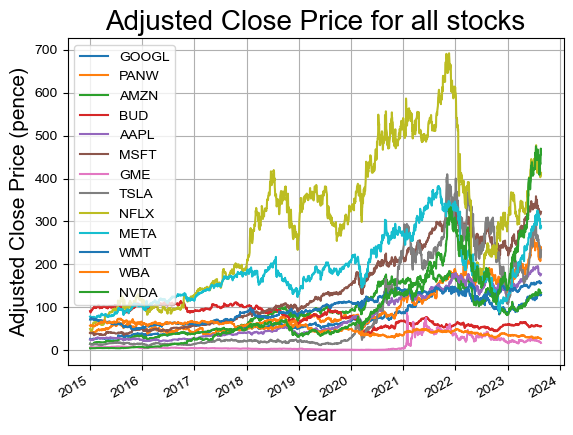

In [6]:
adj_close.plot(grid = True)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Adjusted Close Price for all stocks', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Adjusted Close Price (pence)', color = 'black', fontsize = 15);

In [7]:
adj_close_min_max = adj_close.apply(lambda x: pd.Series([x.min(), x.max()], 
                              index=['min', 'max']))

adj_close_min_max

GOOGL        PANW        AMZN         BUD        AAPL        MSFT  \
min   24.853001   36.003334   14.347500   33.779987   20.826065   35.021561   
max  149.838501  257.880005  186.570496  114.544846  196.185074  358.730469   

           GME        TSLA        NFLX        META         WMT        WBA  \
min   0.700000    9.578000   45.547142   74.050003   47.821095  26.440001   
max  86.877502  409.970001  691.690002  382.179993  161.199997  73.572891   

           NVDA  
min    4.595910  
max  474.940002

In [8]:
returns_lambda = adj_close.apply(lambda x: x / x[0])
returns_lambda.head()

GOOGL      PANW      AMZN       BUD      AAPL      MSFT  \
Date                                                                     
2015-01-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-01-05  0.980946  1.019025  0.979483  0.967335  0.971828  0.990804   
2015-01-06  0.956737  1.003542  0.957118  0.965187  0.971920  0.976262   
2015-01-07  0.953923  1.033850  0.967263  0.979237  0.985548  0.988666   
2015-01-08  0.957247  1.047686  0.973875  1.010202  1.023415  1.017751   

                 GME      TSLA      NFLX      META       WMT       WBA  \
Date                                                                     
2015-01-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
2015-01-05  1.027219  0.957959  0.949103  0.983939  0.997089  0.980263   
2015-01-06  0.996746  0.963385  0.932854  0.970682  1.004773  0.982763   
2015-01-07  0.985207  0.961880  0.937697  0.970682  1.031432  1.007895   
2015-01-08  0.996746  0.960376  0.958503  0.996558  1.053201  1.020395   

                NVDA  
Date                  
2015-01-02  1.000000  
2015-01-05  0.983110  
2015-01-06  0.953304  
2015-01-07  0.950820  
2015-01-08  0.986588

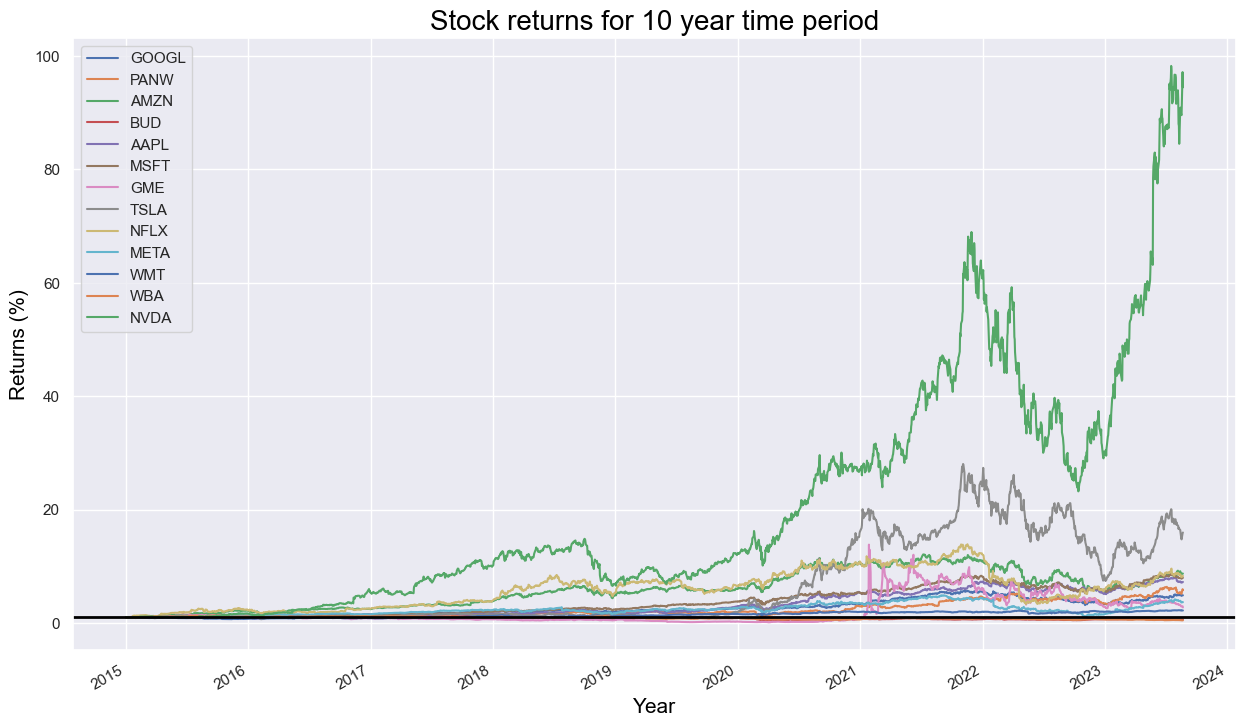

In [9]:

# Plot to show how profitable each stock was throughout the time period

returns_lambda.plot(grid = True).axhline(y = 1, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Stock returns for 10 year time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Returns (%)', color = 'black', fontsize = 15);

In [10]:
returns = pd.DataFrame()
tickers = ["GOOGL", "PANW", "AMZN", "BUD", "AAPL", "MSFT", "GME", "TSLA", "NFLX", "META", "WMT", "WBA", "NVDA"]
for ticker in tickers:
    returns[ticker] = my_stocks[ticker]['Adj Close'].pct_change() * 100

returns

GOOGL       PANW      AMZN       BUD      AAPL      MSFT  \
Date                                                                      
2015-01-02       NaN        NaN       NaN       NaN       NaN       NaN   
2015-01-05 -1.905396   1.902488 -2.051729 -3.266528 -2.817165 -0.919559   
2015-01-06 -2.467943  -1.519429 -2.283333 -0.222029  0.009429 -1.467746   
2015-01-07 -0.294099   3.020104  1.059974  1.455713  1.402197  1.270537   
2015-01-08  0.348416   1.338320  0.683602  3.162134  3.842230  2.941833   
...              ...        ...       ...       ...       ...       ...   
2023-08-16 -0.832179  -0.783642 -1.888568 -0.828678 -0.495909 -0.242845   
2023-08-17  0.947942  -2.991071 -0.806998  0.617621 -1.455517 -1.098623   
2023-08-18 -1.893472   1.021340 -0.567245  0.649938  0.281612 -0.126229   
2023-08-21  0.713946  14.840953  1.095925  0.807176  0.773678  1.706267   
2023-08-22  0.553094  -2.595407 -0.319270 -0.106764  0.790491  0.180187   

                 GME      TSLA      NFLX      META       WMT       WBA  \
Date                                                                     
2015-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2015-01-05  2.721872 -4.204103 -5.089702 -1.606112 -0.291059 -1.973704   
2015-01-06 -2.966566  0.566424 -1.712055 -1.347326  0.770611  0.255019   
2015-01-07 -1.157631 -0.156193  0.519185  0.000000  2.653202  2.557262   
2015-01-08  1.171190 -0.156431  2.218820  2.665790  2.110597  1.240197   
...              ...       ...       ...       ...       ...       ...   
2023-08-16 -3.828245 -3.159341 -1.947132 -2.536845  0.050259 -1.433566   
2023-08-17 -1.129645 -2.828016 -2.996753 -3.126172 -2.241613 -3.653785   
2023-08-18 -0.108806 -1.701485  0.379652 -0.645409  1.438750 -0.524728   
2023-08-21  0.653589  7.327483  0.929476  2.347747 -0.265939 -0.376791   
2023-08-22 -6.601728  0.825840  1.195230 -0.793373 -0.317440  0.378216   

                NVDA  
Date                  
2015-01-02       NaN  
2015-01-05 -1.688986  
2015-01-06 -3.031847  
2015-01-07 -0.260516  
2015-01-08  3.761744  
...              ...  
2023-08-16 -1.033229  
2023-08-17 -0.326538  
2023-08-18 -0.103823  
2023-08-21  8.471333  
2023-08-22 -2.765776  

[2174 rows x 13 columns]

In [11]:

# Use numpy's log function to obtain and plot the log differences of the adjusted price data

stock_change = adj_close.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.

stock_change.head()

GOOGL      PANW      AMZN       BUD      AAPL      MSFT  \
Date                                                                     
2015-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2015-01-05 -0.019238  0.018846 -0.020731 -0.033211 -0.028576 -0.009238   
2015-01-06 -0.024989 -0.015311 -0.023098 -0.002223  0.000094 -0.014786   
2015-01-07 -0.002945  0.029754  0.010544  0.014452  0.013925  0.012625   
2015-01-08  0.003478  0.013294  0.006813  0.031132  0.037703  0.028994   

                 GME      TSLA      NFLX      META       WMT       WBA  \
Date                                                                     
2015-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2015-01-05  0.026855 -0.042950 -0.052238 -0.016191 -0.002915 -0.019934   
2015-01-06 -0.030115  0.005648 -0.017269 -0.013565  0.007677  0.002547   
2015-01-07 -0.011644 -0.001563  0.005178  0.000000  0.026186  0.025251   
2015-01-08  0.011644 -0.001566  0.021946  0.026309  0.020886  0.012326   

                NVDA  
Date                  
2015-01-02       NaN  
2015-01-05 -0.017034  
2015-01-06 -0.030788  
2015-01-07 -0.002609  
2015-01-08  0.036927

In [12]:
stock_change.dropna(inplace=True)
stock_change.head()

GOOGL      PANW      AMZN       BUD      AAPL      MSFT  \
Date                                                                     
2015-01-05 -0.019238  0.018846 -0.020731 -0.033211 -0.028576 -0.009238   
2015-01-06 -0.024989 -0.015311 -0.023098 -0.002223  0.000094 -0.014786   
2015-01-07 -0.002945  0.029754  0.010544  0.014452  0.013925  0.012625   
2015-01-08  0.003478  0.013294  0.006813  0.031132  0.037703  0.028994   
2015-01-09 -0.012286 -0.010987 -0.011818 -0.008094  0.001072 -0.008441   

                 GME      TSLA      NFLX      META       WMT       WBA  \
Date                                                                     
2015-01-05  0.026855 -0.042950 -0.052238 -0.016191 -0.002915 -0.019934   
2015-01-06 -0.030115  0.005648 -0.017269 -0.013565  0.007677  0.002547   
2015-01-07 -0.011644 -0.001563  0.005178  0.000000  0.026186  0.025251   
2015-01-08  0.011644 -0.001566  0.021946  0.026309  0.020886  0.012326   
2015-01-09 -0.043063 -0.018981 -0.015578 -0.005644 -0.012457 -0.024541   

                NVDA  
Date                  
2015-01-05 -0.017034  
2015-01-06 -0.030788  
2015-01-07 -0.002609  
2015-01-08  0.036927  
2015-01-09  0.004020

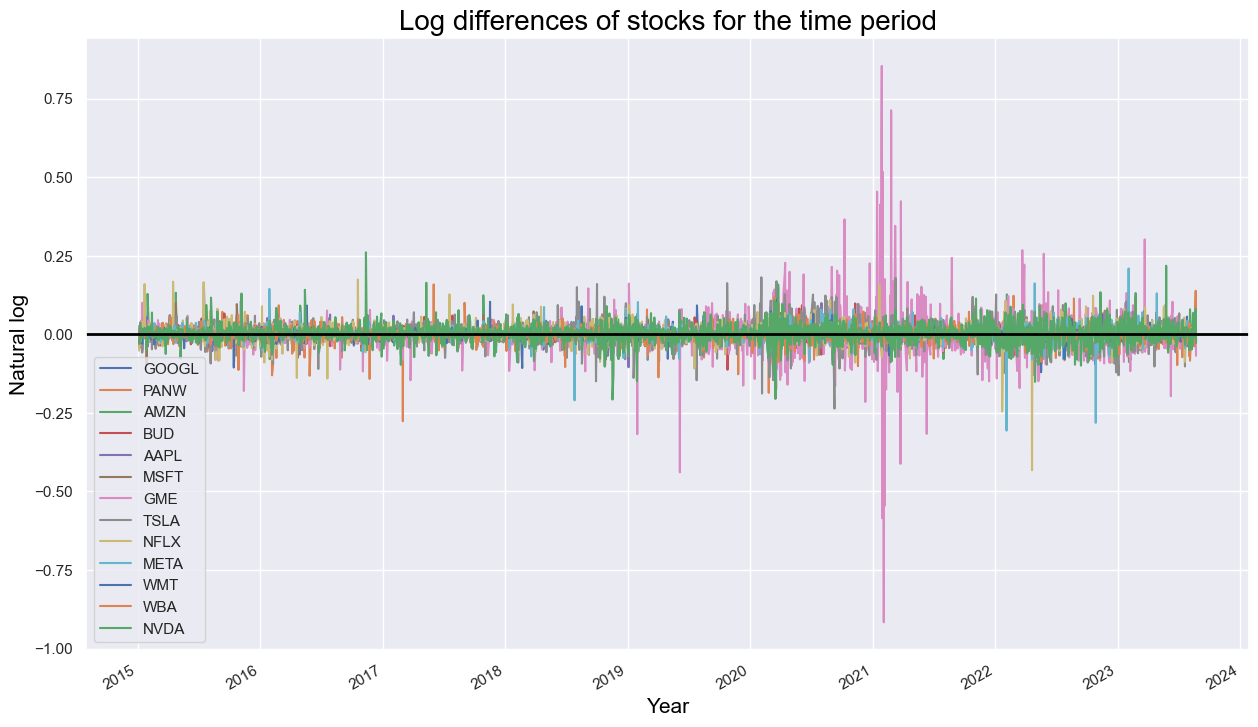

In [13]:

# Plot log differences for 2010-2019

stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for the time period', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

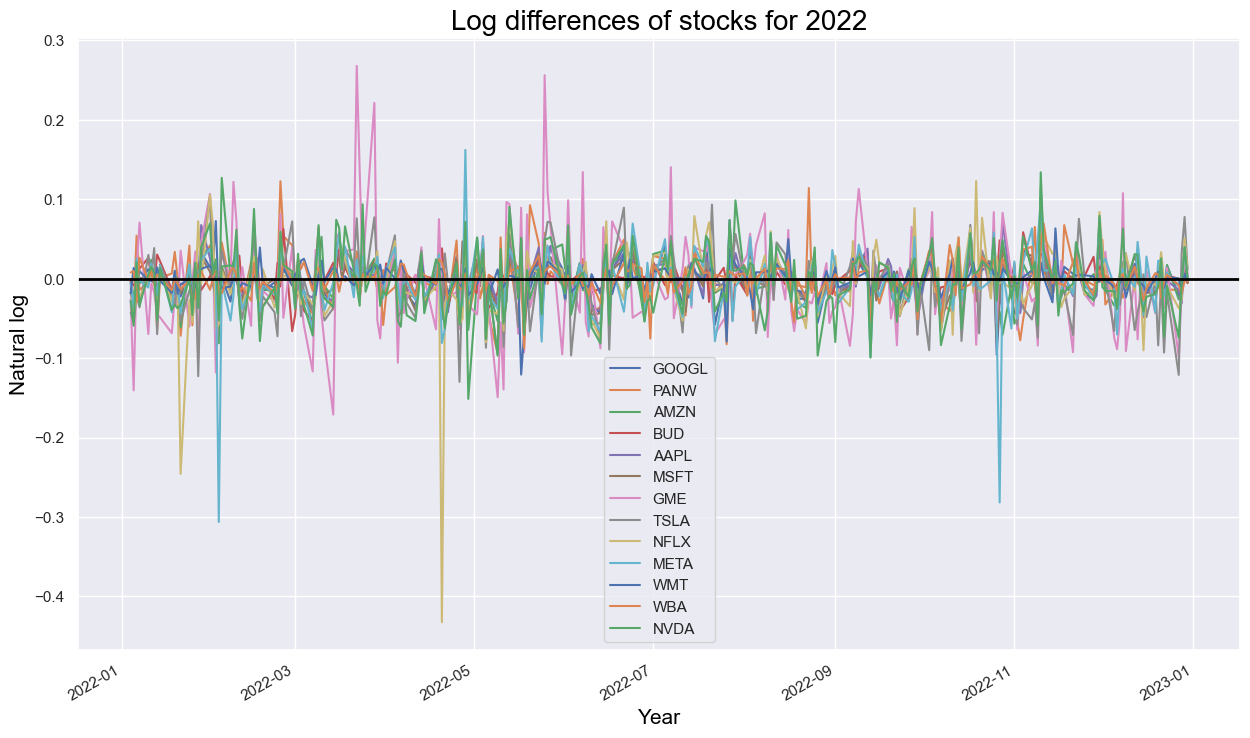

In [14]:

# Plot log differences for 2022

stock_change.loc['2022-01-01':'2022-12-31'][1:].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Log differences of stocks for 2022', color = 'black', fontsize = 20)
plt.xlabel('Year', color = 'black', fontsize = 15)
plt.ylabel('Natural log', color = 'black', fontsize = 15);

In [15]:

# annualise returns

stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

stock_change_apr
     

GOOGL         PANW        AMZN         BUD        AAPL  \
Date                                                                      
2015-01-05 -484.793312   474.923597 -522.413482 -836.909530 -720.117313   
2015-01-06 -629.724637  -385.834870 -582.070923  -56.013425    2.376043   
2015-01-07  -74.222022   749.799901  265.707715  364.195177  350.899155   
2015-01-08   87.648311   335.019699  171.681536  784.518404  950.104020   
2015-01-09 -309.619190  -276.871029 -297.817894 -203.979730   27.012245   
...                ...          ...         ...         ...         ...   
2023-08-16 -210.586544  -198.255619 -480.470432 -209.696890 -125.279837   
2023-08-17  237.756240  -765.252344 -204.188383  155.161735 -369.485943   
2023-08-18 -481.730246   256.072163 -143.352645  163.254403   70.866575   
2023-08-21  179.275279  3487.124830  274.670771  202.591875  194.216524   
2023-08-22  138.995648  -662.679924  -80.584724  -26.918902  198.420519   

                  MSFT          GME         TSLA         NFLX        META  \
Date                                                                        
2015-01-05 -232.800889   676.742871 -1082.348286 -1316.396870 -408.025641   
2015-01-06 -372.613280  -758.887561   142.336047  -435.173729 -341.834150   
2015-01-07  318.158443  -293.424812   -39.391423   130.496113    0.000000   
2015-01-08  730.646644   293.424812   -39.451383   553.029709  662.980875   
2015-01-09 -212.704553 -1085.192926  -478.311798  -392.577301 -142.227951   
...                ...          ...          ...          ...         ...   
2023-08-16  -61.271272  -983.668879  -809.001828  -495.517351 -647.533566   
2023-08-17 -278.385091  -286.290615  -722.931283  -766.728586 -800.372103   
2023-08-18  -31.829756   -27.434051  -432.463931    95.491227 -163.170180   
2023-08-21  426.352180   164.168500  1782.006967   233.146136  584.794097   
2023-08-22   45.366315 -1721.093032   207.257147   299.412184 -200.727269   

                   WMT         WBA         NVDA  
Date                                             
2015-01-05  -73.453876 -502.347423  -429.259890  
2015-01-06  193.449583   64.182960  -775.847152  
2015-01-07  659.890972  636.327992   -65.735811  
2015-01-08  526.335279  310.607499   930.564481  
2015-01-09 -313.905712 -618.442330   101.302747  
...                ...         ...          ...  
2023-08-16   12.662016 -363.872996  -261.728196  
2023-08-17 -571.313886 -937.996427   -82.422208  
2023-08-18  359.981600 -132.579659   -26.177092  
2023-08-21  -67.106014  -95.130711  2049.156611  
2023-08-22  -80.122161   95.130711  -706.795444  

[2173 rows x 13 columns]

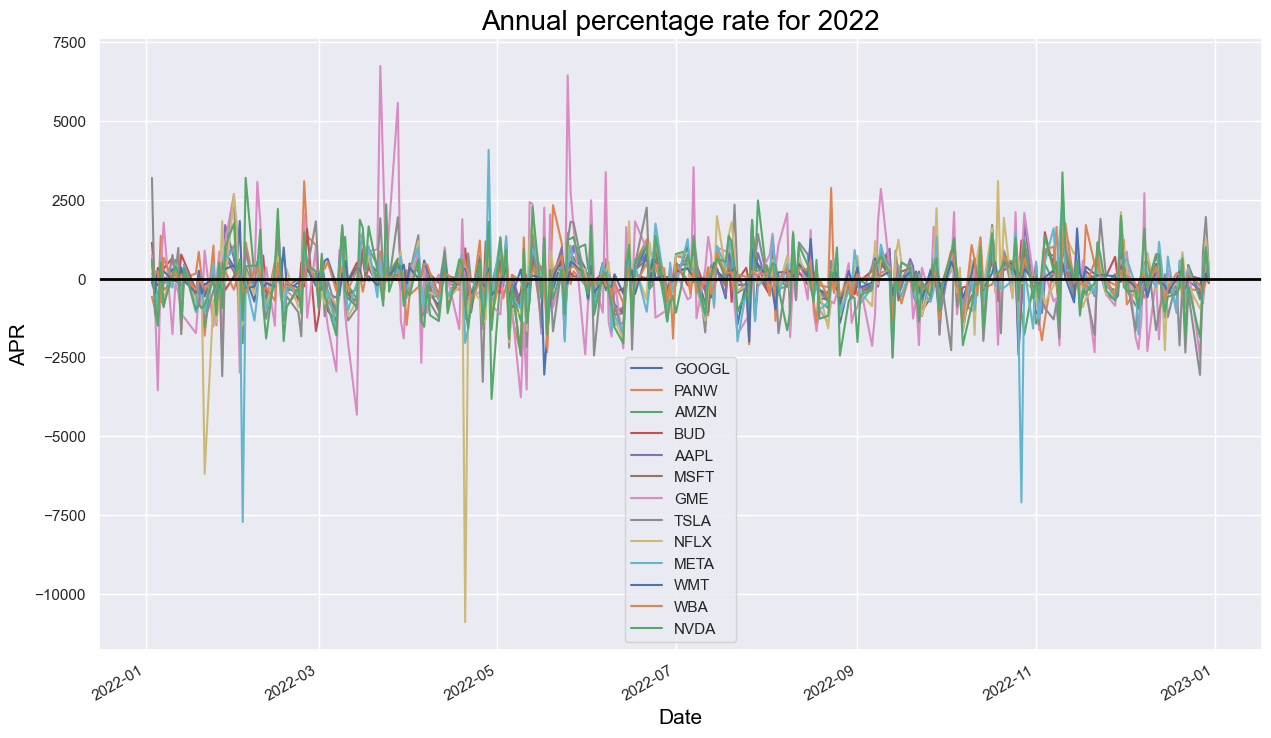

In [16]:

# Plot annualised returns for 2019

stock_change_apr['2022-01-01':'2022-12-31'].plot(grid = True).axhline(y = 0, color = "black", lw = 2)
sns.set(rc={'figure.figsize':(15, 9)})
plt.title('Annual percentage rate for 2022', color = 'black', fontsize = 20)
plt.xlabel('Date', color = 'black', fontsize = 15)
plt.ylabel('APR', color = 'black', fontsize = 15);

In [17]:
## Minimum and Maximum values, Mean, Variance, Standard Deviation, Covariance

In [18]:
returns.idxmin(),returns.mean(),returns.var(),returns.std(), returns.cov()

(GOOGL   2020-03-16
 PANW    2017-03-01
 AMZN    2022-04-29
 BUD     2020-03-16
 AAPL    2020-03-16
 MSFT    2020-03-16
 GME     2021-02-02
 TSLA    2020-09-08
 NFLX    2022-04-20
 META    2022-02-03
 WMT     2022-05-17
 WBA     2019-04-02
 NVDA    2018-11-16
 dtype: datetime64[ns],
 GOOGL    0.089075
 PANW     0.110115
 AMZN     0.121640
 BUD     -0.006509
 AAPL     0.108238
 MSFT     0.111128
 GME      0.268475
 TSLA     0.191339
 NFLX     0.138545
 META     0.088883
 WMT      0.045473
 WBA     -0.018045
 NVDA     0.256037
 dtype: float64,
 GOOGL     3.241351
 PANW      5.796977
 AMZN      4.430907
 BUD       3.148803
 AAPL      3.426403
 MSFT      3.133741
 GME      51.695339
 TSLA     12.789042
 NFLX      8.102470
 META      5.726530
 WMT       1.846334
 WBA       3.464908
 NVDA      9.409096
 dtype: float64,
 GOOGL    1.800375
 PANW     2.407691
 AMZN     2.104972
 BUD      1.774487
 AAPL     1.851055
 MSFT     1.770237
 GME      7.189947
 TSLA     3.576177
 NFLX     2.846484
 MET

## Pair Plots

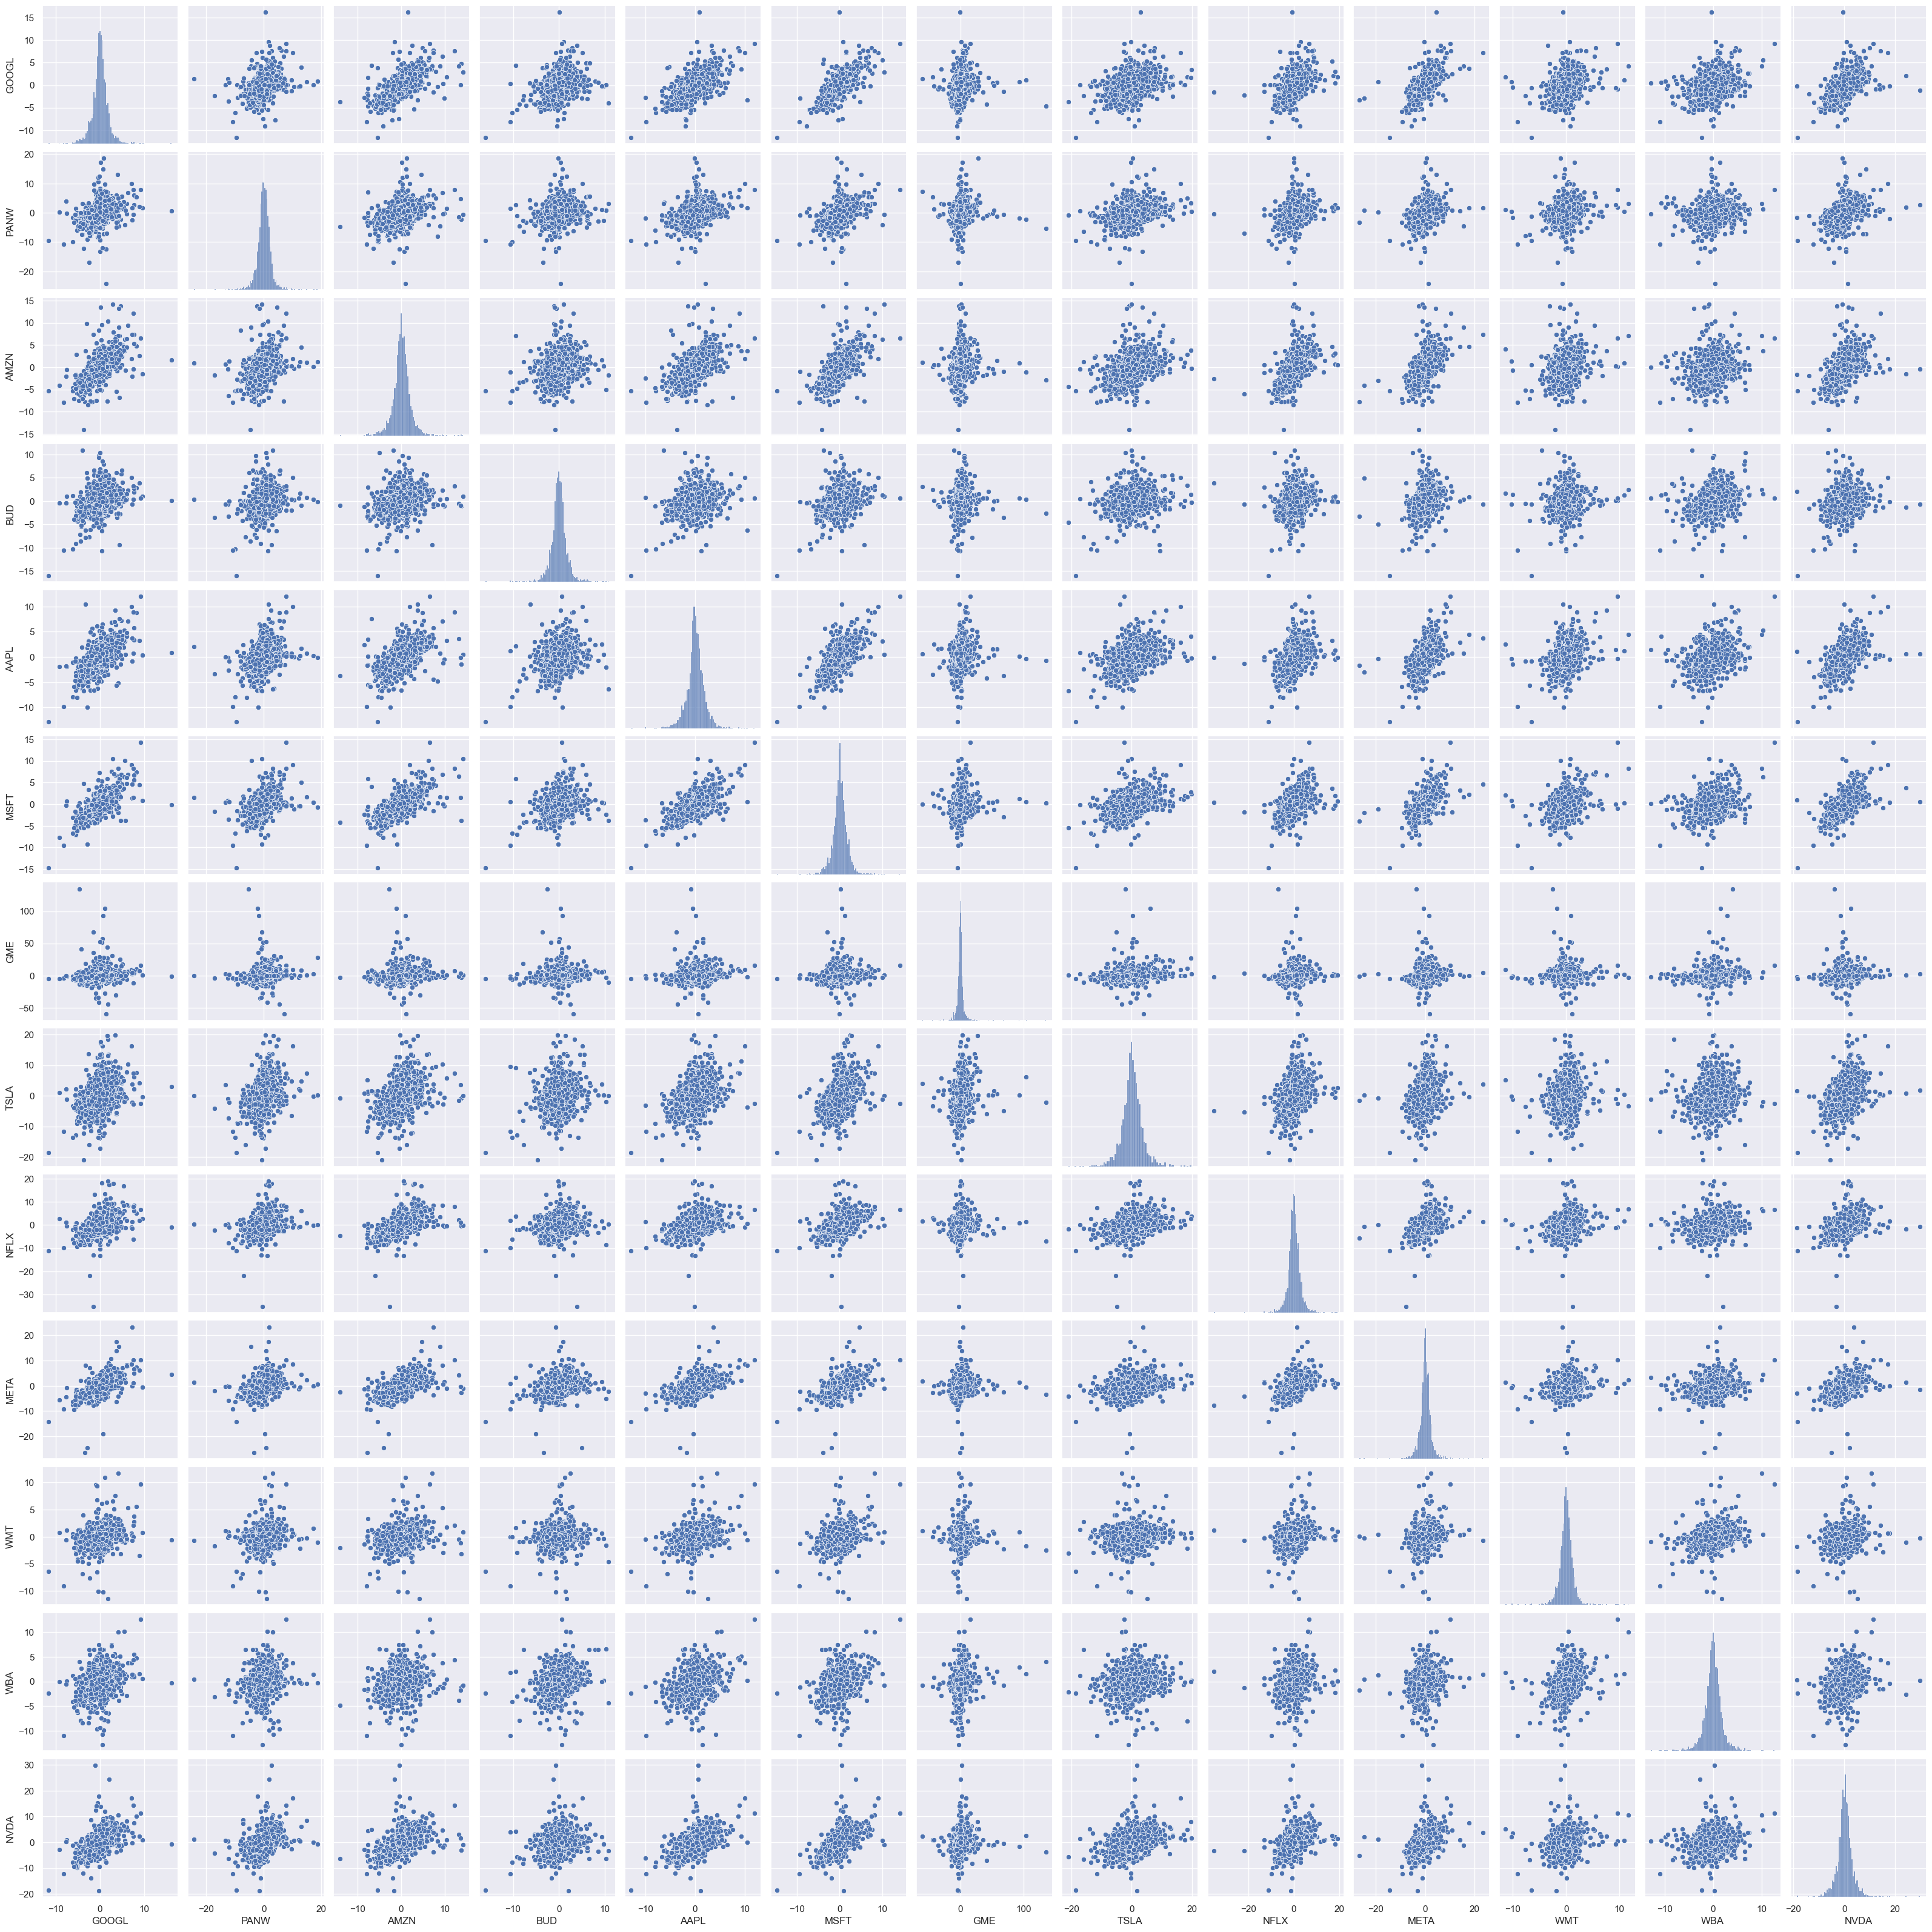

In [19]:
sns.pairplot(returns);

## Box Plots

IndexError: index 6 is out of bounds for axis 0 with size 6

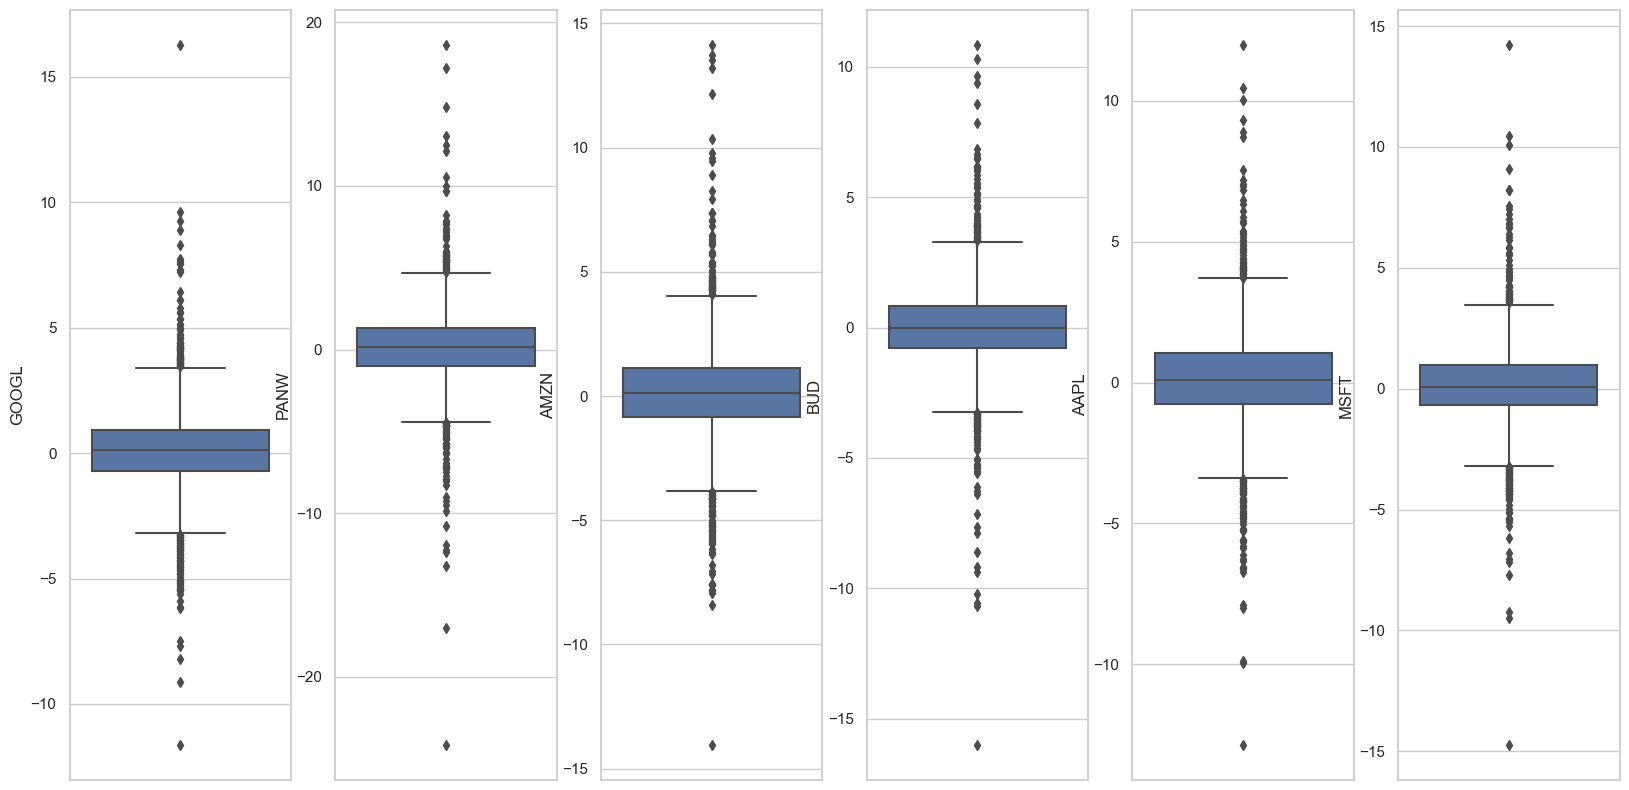

In [20]:
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in returns.items():
    sns.boxplot(y=k, data=returns, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

## Distribution Plots

/var/folders/b_/qpl3sp4n7_55mr2n2w20rmh40000gn/T/ipykernel_14207/3966504295.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2022-01-01':'2022-12-31'][ticker], color='green', bins=100, ax=axs[index])
/var/folders/b_/qpl3sp4n7_55mr2n2w20rmh40000gn/T/ipykernel_14207/3966504295.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/d

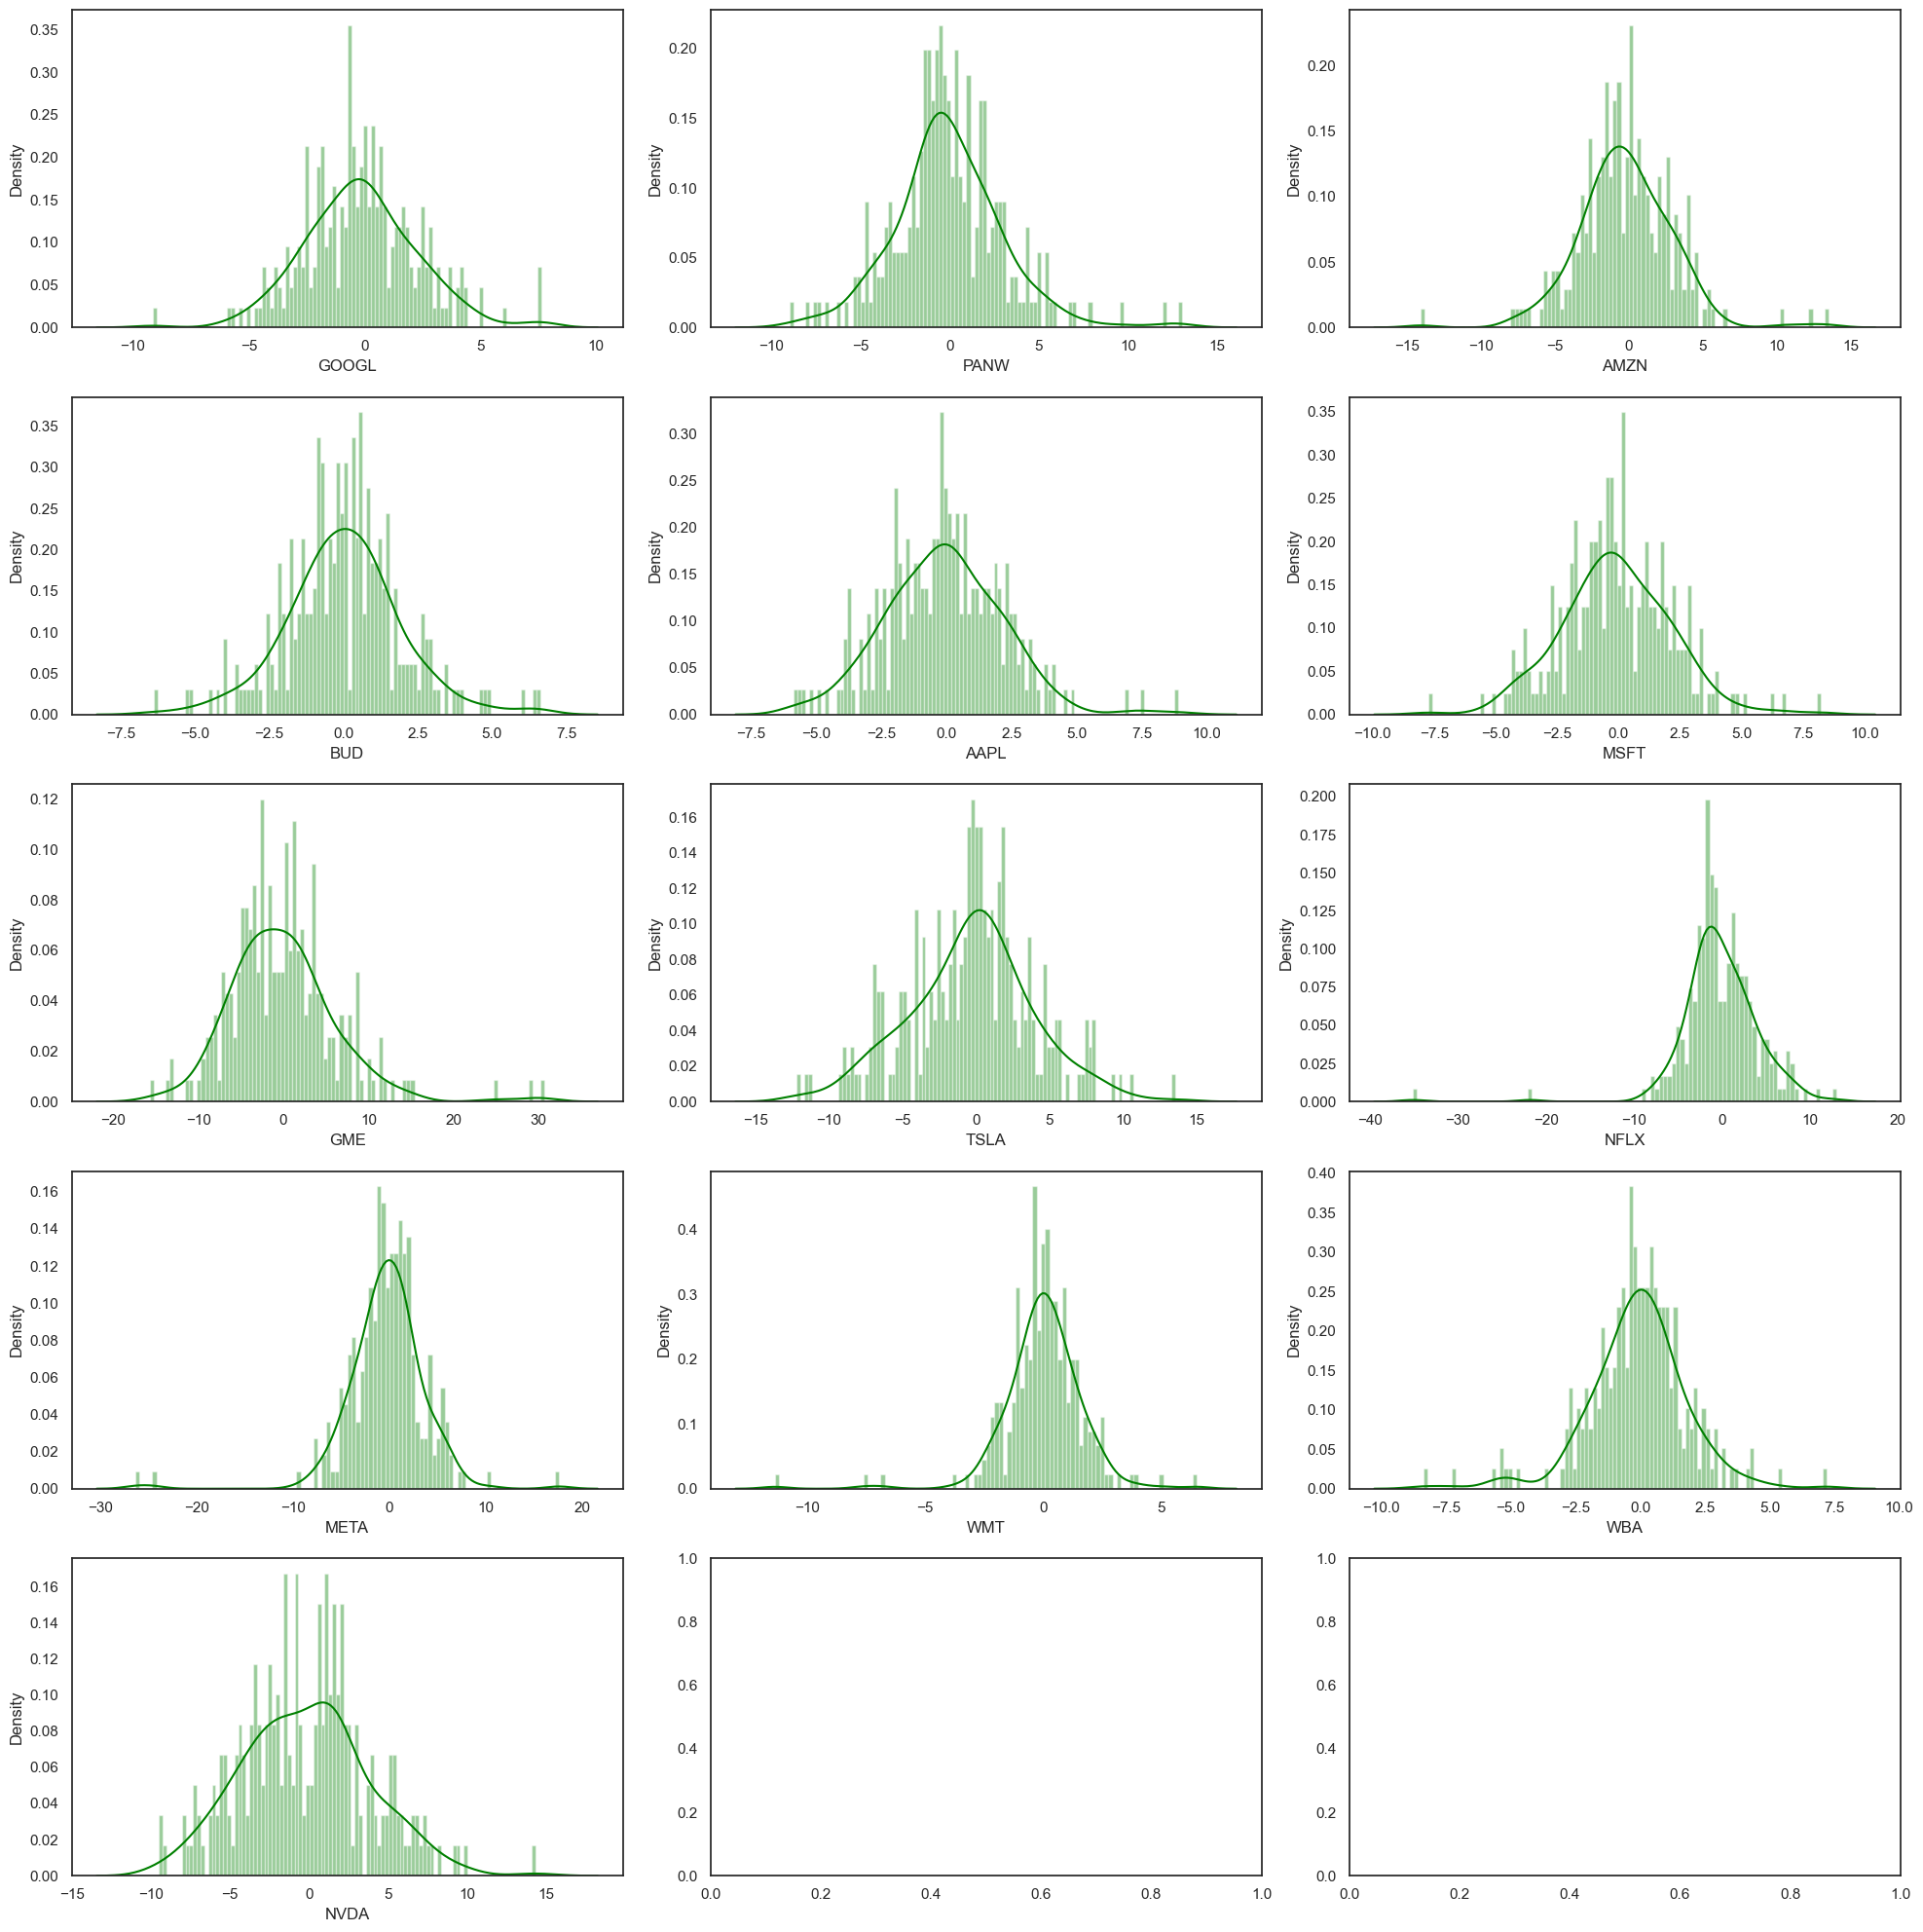

In [22]:
sns.set_style("white")

tickers = ["GOOGL", "PANW", "AMZN", "BUD", "AAPL", "MSFT", "GME", "TSLA", "NFLX", "META", "WMT", "WBA", "NVDA"]
fig, axs = plt.subplots(ncols=3, nrows=5, figsize=(20, 20))
index = 0
axs = axs.flatten()

for ticker in tickers:
    sns.distplot(returns.loc['2022-01-01':'2022-12-31'][ticker], color='green', bins=100, ax=axs[index])
    index += 1

plt.tight_layout()
plt.show()


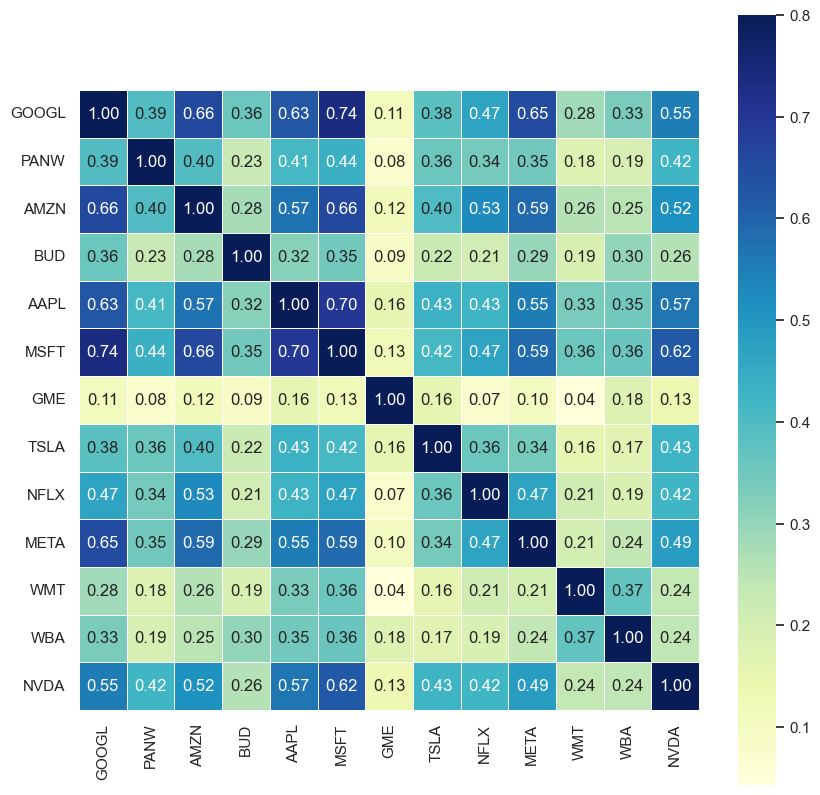

In [23]:
plt.figure(figsize=(10, 10))
sns.heatmap(data = returns.corr(), vmax=.8, linewidths=0.5,  fmt='.2f',
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.show()